In [32]:
import pandas as pd
import numpy as np
import matplotlib 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#1, 2 

<AxesSubplot:xlabel='x', ylabel='y'>

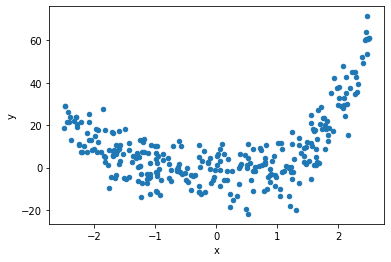

In [33]:
import numpy as np
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0  + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [34]:
X_train, X_test = X[:240], X[240:]
y_train, y_test = y[:240], y[240:]
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [35]:
test_errors = []
train_errors = []

In [36]:
X_new = np.array([[0], [2]])

In [37]:
#regresja linowa
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
print(lin_reg.intercept_, lin_reg.coef_, "\n",lin_reg.predict(X_new))

[8.54618662] [[2.97578554]] 
 [[ 8.54618662]
 [14.4977577 ]]


In [38]:
#mse lin_reg
y_train_predict = lin_reg.predict(X_train)
y_test_predict = lin_reg.predict(X_test)

train_errors.append(mean_squared_error(y_train, y_train_predict))
test_errors.append(mean_squared_error(y_test, y_test_predict))

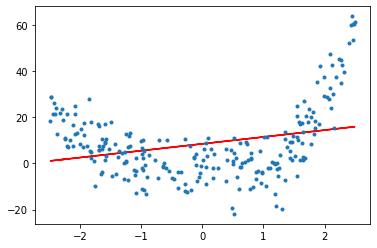

In [39]:
from matplotlib import pyplot as plt
import matplotlib
plt.plot(X_train, lin_reg.predict(X_train), "r-")
plt.plot(X_train, y_train, ".")

In [40]:
#regresja kNN k = 3
import sklearn.neighbors 
knn_3_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_3_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
#mse knn3
y_train_predict = knn_3_reg.predict(X_train)
y_test_predict = knn_3_reg.predict(X_test)
train_errors.append(mean_squared_error(y_train, y_train_predict))
test_errors.append(mean_squared_error(y_test, y_test_predict))
print(test_errors)
print(train_errors)

[263.2553303546067, 79.72561673290238]
[221.1451859670865, 41.20263722666693]


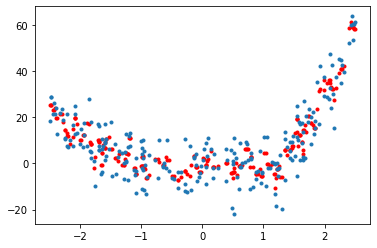

In [42]:
from matplotlib import pyplot as plt
import matplotlib
plt.plot(X_train, knn_3_reg.predict(X_train), "r.")
plt.plot(X_train, y_train, ".")

In [43]:
#regresja kNN k = 5
import sklearn.neighbors 
knn_5_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train, y_train)

#print(knn_reg.predict(X_train))

KNeighborsRegressor()

In [44]:
#mse knn5
y_train_predict = knn_5_reg.predict(X_train)
y_test_predict = knn_5_reg.predict(X_test)
train_errors.append(mean_squared_error(y_train, y_train_predict))
test_errors.append(mean_squared_error(y_test, y_test_predict))
print(test_errors)
print(train_errors)

[263.2553303546067, 79.72561673290238, 75.82329072577842]
[221.1451859670865, 41.20263722666693, 48.07065053854867]


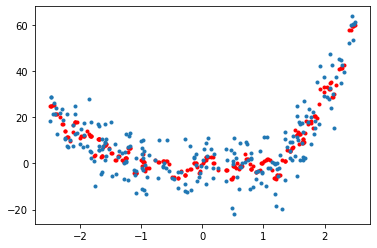

In [45]:
from matplotlib import pyplot as plt
import matplotlib
plt.plot(X_train, knn_5_reg.predict(X_train), "r.")
plt.plot(X_train, y_train, ".")
# the red dots are actual values, blue are predicted

In [46]:
# regresja wielomianowa st = 2
from sklearn.preprocessing import PolynomialFeatures
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features_2.fit_transform(X_train)
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly, y_train)
print(X[0], X_poly[0])
print(poly_2_reg.intercept_, poly_2_reg.coef_)
print(poly_2_reg.predict(poly_features_2.fit_transform([[0],[2]])))
print(poly_2_reg.coef_[0][1] * 2**2 + poly_2_reg.coef_[0][0] * 2+ poly_2_reg.intercept_[0])

-2.2945465688505977 [-2.29454657  5.26494396]
[-5.8208874] [[3.28655138 6.62221333]]
[[-5.8208874 ]
 [27.24106869]]
27.241068694159438


In [47]:
#mse poly2
X_poly_test = poly_features_2.fit_transform(X_test)
y_train_predict = poly_2_reg.predict(X_poly)
y_test_predict = poly_2_reg.predict(X_poly_test)
train_errors.append(mean_squared_error(y_train, y_train_predict))
test_errors.append(mean_squared_error(y_test, y_test_predict))
print(test_errors)
print(train_errors)

[263.2553303546067, 79.72561673290238, 75.82329072577842, 77.42369179805904]
[221.1451859670865, 41.20263722666693, 48.07065053854867, 79.65778132151402]


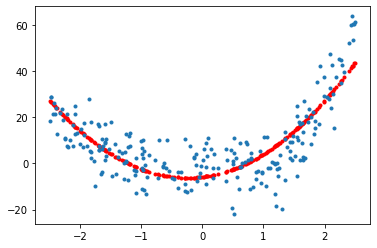

In [48]:
from matplotlib import pyplot as plt
import matplotlib
plt.plot(X_train, poly_2_reg.predict(X_poly), "r.")
plt.plot(X_train, y_train, ".")
# the red dots are actual values, blue are predicted

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features_3.fit_transform(X_train)
poly_3_reg = LinearRegression()
poly_3_reg.fit(X_poly, y_train)
print(X[0], X_poly[0])
print(poly_3_reg.intercept_, poly_3_reg.coef_)
print(poly_3_reg.predict(poly_features_3.fit_transform([[0],[2]])))
print(poly_3_reg.coef_[0][1] * 2**2 + poly_3_reg.coef_[0][0] * 2+ poly_3_reg.intercept_[0])

-2.2945465688505977 [ -2.29454657   5.26494396 -12.08065909]
[-5.71025268] [[-2.35111714  6.63638741  1.54109074]]
[[-5.71025268]
 [28.46178858]]
16.133062666747385


In [50]:
#mse poly3
X_poly_test = poly_features_3.fit_transform(X_test)
y_train_predict = poly_3_reg.predict(X_poly)
y_test_predict = poly_3_reg.predict(X_poly_test)
train_errors.append(mean_squared_error(y_train, y_train_predict))
test_errors.append(mean_squared_error(y_test, y_test_predict))
print(test_errors)
print(train_errors)

[263.2553303546067, 79.72561673290238, 75.82329072577842, 77.42369179805904, 64.65952171138487]
[221.1451859670865, 41.20263722666693, 48.07065053854867, 79.65778132151402, 65.70442707857018]


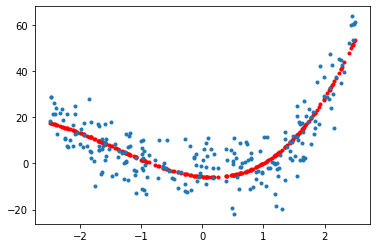

In [51]:
from matplotlib import pyplot as plt
import matplotlib
plt.plot(X_train, poly_3_reg.predict(X_poly), "r.")
plt.plot(X_train, y_train, ".")
# the red dots are actual values, blue are predicted

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly_features_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features_4.fit_transform(X_train)
poly_4_reg = LinearRegression()
poly_4_reg.fit(X_poly, y_train)
print(X[0], X_poly[0])
print(poly_4_reg.intercept_, poly_4_reg.coef_)
print(poly_4_reg.predict(poly_features_4.fit_transform([[0],[2]])))
print(poly_4_reg.coef_[0][1] * 2**2 + poly_4_reg.coef_[0][0] * 2+ poly_4_reg.intercept_[0])

-2.2945465688505977 [ -2.29454657   5.26494396 -12.08065909  27.71963487]
[-2.02275087] [[-2.39474757  1.52312153  1.55811446  0.93322197]]
[[-2.02275087]
 [26.67670734]]
-0.719759884101105


In [53]:
#mse poly4
X_poly_test = poly_features_4.fit_transform(X_test)
y_train_predict = poly_4_reg.predict(X_poly)
y_test_predict = poly_4_reg.predict(X_poly_test)
train_errors.append(mean_squared_error(y_train, y_train_predict))
test_errors.append(mean_squared_error(y_test, y_test_predict))
print(test_errors)
print(train_errors)

[263.2553303546067, 79.72561673290238, 75.82329072577842, 77.42369179805904, 64.65952171138487, 60.42424679340207]
[221.1451859670865, 41.20263722666693, 48.07065053854867, 79.65778132151402, 65.70442707857018, 57.29659242059708]


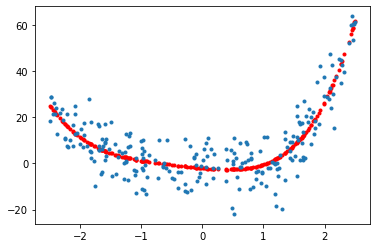

In [54]:
from matplotlib import pyplot as plt
import matplotlib
plt.plot(X_train, poly_4_reg.predict(X_poly), "r.")
plt.plot(X_train, y_train, ".")
# the red dots are actual values, blue are predicted

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly_features_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features_5.fit_transform(X_train)
poly_5_reg = LinearRegression()
poly_5_reg.fit(X_poly, y_train)
print(X[0], X_poly[0])
print(poly_5_reg.intercept_, poly_5_reg.coef_)
print(poly_5_reg.predict(poly_features_5.fit_transform([[0],[2]])))
print(poly_5_reg.coef_[0][1] * 2**2 + poly_5_reg.coef_[0][0] * 2+ poly_5_reg.intercept_[0])

-2.2945465688505977 [ -2.29454657   5.26494396 -12.08065909  27.71963487 -63.60399307]
[-2.03902958] [[-1.94752455  1.53557714  1.2384325   0.93126063  0.04487716]]
[[-2.03902958]
 [26.45192908]]
0.20822990044166456


In [56]:
#mse poly5
X_poly_test = poly_features_5.fit_transform(X_test)
y_train_predict = poly_5_reg.predict(X_poly)
y_test_predict = poly_5_reg.predict(X_poly_test)
train_errors.append(mean_squared_error(y_train, y_train_predict))
test_errors.append(mean_squared_error(y_test, y_test_predict))
print(test_errors)
print(train_errors)

[263.2553303546067, 79.72561673290238, 75.82329072577842, 77.42369179805904, 64.65952171138487, 60.42424679340207, 60.630106061265494]
[221.1451859670865, 41.20263722666693, 48.07065053854867, 79.65778132151402, 65.70442707857018, 57.29659242059708, 57.26660484164373]


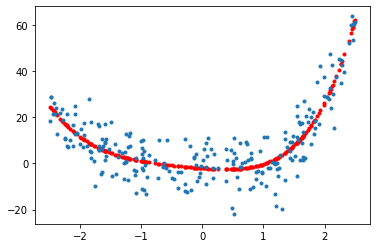

In [57]:
from matplotlib import pyplot as plt
import matplotlib
plt.plot(X_train, poly_5_reg.predict(X_poly), "r.")
plt.plot(X_train, y_train, ".")
# the red dots are actual values, blue are predicted

In [58]:
mse = pd.DataFrame({"train_mse": train_errors, "test_mse": test_errors})
import pickle
with open('mse.pkl', 'wb') as f_acc:
    pickle.dump(mse, f_acc)

In [59]:
reg = [(lin_reg, None), (knn_3_reg, None), (knn_5_reg, None), (poly_2_reg,poly_features_2), (poly_3_reg, poly_features_3), (poly_4_reg, poly_features_4),(poly_5_reg, poly_features_5)]
with open('reg.pkl', 'wb') as f_acc:
    pickle.dump(mse, f_acc)

In [60]:
mse = mse.rename(index={0 : "lin_reg", 1 : "knn_3_reg", 2 : "knn_5_reg", 3 : "poly_2_reg", 4 : "poly_3_reg", 5 : "poly_4_reg", 6 : "poly_5_reg"})
mse

,train_mse,test_mse
lin_reg,221.145186,263.255330
knn_3_reg,41.202637,79.725617
knn_5_reg,48.070651,75.823291
poly_2_reg,79.657781,77.423692
poly_3_reg,65.704427,64.659522
poly_4_reg,57.296592,60.424247
poly_5_reg,57.266605,60.630106
